# Promoter analysis
**Jose V. Die**.  

Dpt. Genetics - ETSIAM  
University of Cordoba

<br>

### Outline
1. Search for [occurrences](#Search-for-occurrences) in the actual dataset 
2. Estimate [GC](#Estimating-the-average-GC-content) content
3. Estimate for [occurrences](#Random-promoters-with-at-least-1-regulatory-element) in simulated dataset
4. Estimate [P value](#P-value) for occurrences in the actual dataset

<br>

In [1]:
# set wd for the actual experiment
# %cd "/Users/josedie/Google Drive/Asparagus/2 NBS/data"
%cd "/Users/josedie/Desktop/giuseppe/"

/Users/josedie/Desktop/giuseppe


Read the functions needed for the analysis:

In [2]:
import my_functions

I will start by reading the set of sequences saved in the file containing the promoter sequences.

In [3]:
# read Promoter sequences
genome = my_functions.readGenome("promotore2.fa")

In [4]:
! head promotore.fa

Total number of sequences:

In [5]:
len(genome)

71

In [7]:
names = my_functions.nameGenome("promotore2.fa")
names[1:5]

['LOC101496545', 'LOC101507087', 'LOC101498503', 'LOC101496545']

<br>

### Search for occurrences

The motifs SRE is defined (according the paper provided by Giuseppe) by:

In [8]:
CRE = ['ACCAAAT', 'ACCAACT', 'ACCTAAT', 'ACCTACT', 'ACCAAAC', 'ACCAACC', 'ACCTAAC', 'ACCTACC']

The regulatory element is present in some promoters but not in others.

In [9]:
my_functions.search(CRE, genome)

([2,
  2,
  5,
  6,
  7,
  9,
  9,
  12,
  14,
  15,
  17,
  18,
  20,
  22,
  23,
  23,
  29,
  33,
  35,
  36,
  38,
  39,
  41,
  41,
  42,
  43,
  43,
  46,
  48,
  49,
  50,
  54,
  57,
  60,
  60,
  60,
  61,
  61,
  61,
  63,
  63,
  65,
  65,
  66,
  66,
  67,
  67],
 [[261],
  [257],
  [625],
  [253],
  [1187],
  [217, 877],
  [892],
  [627],
  [20],
  [765],
  [123],
  [907],
  [464, 1112],
  [783],
  [997],
  [1239],
  [1463],
  [1256],
  [1453],
  [890],
  [627],
  [1239],
  [1256],
  [891],
  [123],
  [304, 368, 1241],
  [300],
  [1397],
  [1236],
  [456],
  [123],
  [1138],
  [1332],
  [876],
  [370],
  [907],
  [57, 1118],
  [216, 1062],
  [751],
  [292],
  [1334],
  [22],
  [18],
  [42],
  [1366],
  [610],
  [740]])

In [10]:
# Check
genome[2][885:885+len(CRE[0])]

'ACATTAG'

In [11]:
'ACCAAAT' in CRE

True

In [12]:
# Check
genome[2][379:379+len(CRE[0])]

'TCATCCT'

In [13]:
'ACCTACT' in CRE

True

In [14]:
# Check
genome[8][1288:1288+len(CRE[0])]

'TGATTTG'

In [15]:
'ACCAAAT' in CRE

True

However, the regulatory element **is not present** in the following promoters:

In [16]:
my_functions.search(CRE, genome[1])

([], [])

In [17]:
my_functions.search(CRE, genome[6])

([], [])

In [18]:
my_functions.search(CRE, genome[9])

([], [])

#### Summary:

In [20]:
my_functions.search(CRE, genome[0])

([], [])

In [21]:
a, b = my_functions.search(CRE, genome)
occurr = 0
for pos in b :  
    occurr += 1
print len(set(a)), 'promoters with', occurr, 'occurrences'

34 promoters with 47 occurrences


<br>

### Estimating the average GC content 

Now I am going to estimate the average GC content from a set of sequences.  
I have to perform that calculation because I will use the estimate for further analysis. For example, the estimate will be used for Monte Carlo simulations in order to obtain the occurrence and distribution of CREs over a given promoter sequence. 

**Content GC for each sequence**, using the build-in method GC( )

In [22]:
from Bio.SeqUtils import GC

In [23]:
# avg GC content for each sequence
for seq in genome: 
    print round(GC(seq),2)

21.54
30.11
24.35
31.79
30.29
23.85
29.98
23.58
24.45
24.45
29.78
32.98
28.78
19.45
34.38
24.52
26.45
32.11
36.18
24.52
25.38
30.05
37.97
24.58
27.85
29.51
19.65
19.65
34.04
19.99
28.58
24.78
39.17
33.18
25.32
23.05
23.52
19.79
28.78
27.32
18.59
26.65
32.11
32.84
33.44
17.79
30.25
26.45
24.18
25.85
32.11
25.72
26.38
34.38
30.25
25.38
41.51
37.31
26.45
28.25
21.65
34.51
31.98
23.18
23.72
28.85
29.25
26.8
25.85
28.58
28.11


I want to estimate the total average GC content for my dataset:

In [24]:
gc=[]
for seq in genome: 
    gc.append(GC(seq))
print sum(gc)/len(gc)

27.8038869225


Graphical representation of the GC content for the dataset

In [27]:
%matplotlib inline
import pylab

def plotGC(genome) : 
         ejex=[]
         ejey=[]
         contenido = 0
         for i in range(len(genome)) : 
             ejex.append(i+1)
             contenido +=GC(genome[i])
             mean = contenido/(i+1)
             ejey.append(mean)
         pylab.grid()
         pylab.plot(ejex,ejey, color = "steelblue", lw = 2)
         pylab.axis([0,72,20,30]) #marco dimension de los ejes
         pylab.title("%i Chickpea \n Promoter sequences\nGC%% %0.1f to %0.1f" \
                    % (len(ejey),min(ejey),max(ejey)))
         pylab.xlabel("Number of promoters")
         pylab.ylabel("Content GC%")
        

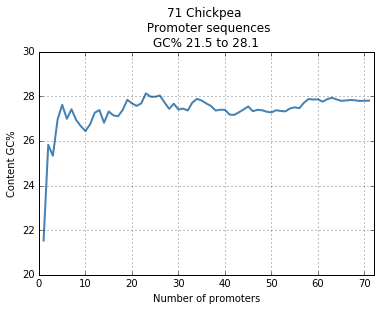

In [28]:
plotGC(genome)
pylab.show()

<br>

Estimate % each base in the data set

In [29]:
totalBases = my_functions.countBases(genome)['G'] \
    + my_functions.countBases(genome)['C'] \
    + my_functions.countBases(genome)['A'] \
    + my_functions.countBases(genome)['T'] \
    + my_functions.countBases(genome)['N']

contA = my_functions.countBases(genome)['A'] / float(totalBases)*100
contT = my_functions.countBases(genome)['T'] / float(totalBases)*100
contG = my_functions.countBases(genome)['G'] / float(totalBases)*100
contC = my_functions.countBases(genome)['C'] / float(totalBases)*100

print 'GC content:',contG+contC,'%'
print ''
print 'A content:',contA,'%'
print 'T content:',contT,'%'
print 'G content:',contG,'%'
print 'C content:',contC,'%'

GC content: 27.8047591367 %

A content: 35.2903673423 %
T content: 36.904873521 %
G content: 13.7861201223 %
C content: 14.0186390144 %


<br>

La suma no sale 100% porque tengo %pequeño con 'N'. Para ponderar esas 'N' voy a atribuirles la proporcion de cada una de las bases que he encontrado. 'contN'

In [31]:
contN = my_functions.countBases(genome)['N']
contN

0

In [32]:
print 'A content:',(my_functions.countBases(genome)['A'] + contN * contA/100)/float(totalBases)*100,'%'
print 'T content:',(my_functions.countBases(genome)['T'] + contN * contA/100)/float(totalBases)*100,'%'
print 'G content:',(my_functions.countBases(genome)['G'] + contN * contA/100)/float(totalBases)*100,'%'
print 'C content:',(my_functions.countBases(genome)['C'] + contN * contA/100)/float(totalBases)*100,'%'
print ''
print 'GC content:',(my_functions.countBases(genome)['G'] \
                     + contN * contA/100)/float(totalBases)*100 \
                    +(my_functions.countBases(genome)['C'] \
                      + contN * contA/100)/float(totalBases)*100,'%'

A content: 35.2903673423 %
T content: 36.904873521 %
G content: 13.7861201223 %
C content: 14.0186390144 %

GC content: 27.8047591367 %


<br>

**Generar un promotor con bases ponderadas**. Usaremos esos valores para definir la siguiente función: **build a promoter using that GC content**.¶

In [33]:
from random import choice

def weightedchoice(items): 
    return choice("".join(x * y for x, y in items))

In [34]:
def getPromoter(length):
       '''Genera promotor con bases ponderadas'''
       DNA = ""
       for count in range(length):
            DNA+=weightedchoice([('C',14),('G',14),('A',35),('T',37)])  #AQUI tengo que introducir la freq. de cada base
       return DNA

### Random promoters with at least 1 regulatory element

In [35]:
import random
nset = 2000
bp = 1500
actualSet = len(genome)

random.seed(25)
vals3 = my_functions.runSimforOneMotif(CRE, 1500, actualSet, 2000)

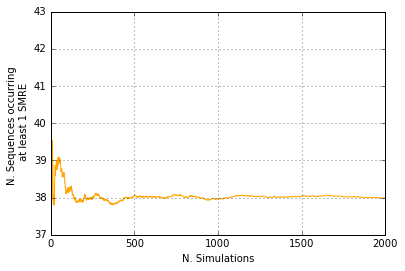

In [36]:
%matplotlib inline
import pylab
numTrials = 2000 
yAxis = vals3
xAxis = range(1,numTrials+1)
pylab.xlabel('N. Simulations')
pylab.ylabel('N. Sequences occurring \n at least 1 SMRE')
pylab.plot(xAxis, yAxis, color = "orange")
pylab.grid()
pylab.show()

**Number of promoters** containing at least 1 SMRE regulatory element just **by chance** over a total of 71 promoters: 

In [41]:
vals3[1999]

37.993

En lugar de estimar en el numero de promotores que deberian haber salido conteniendo al menos 1 motivo, podria estimar del mismo modo el **numero de motivos** que deberian haber salido **por azar**.

In [42]:
random.seed(25)
motiv_random = round(my_functions.estimatedMotif(CRE,1500,2000,actualSet))

In [43]:
motiv_random

56.0

<br>

## P value
Por ultimo, vamos a calcular un *P*-value para el numero de promotores que contienen al menos 1 SRME, que hemos encontrado en nuestro data set

cuantas promotores de 1500bp debo tener para encontrar al azar 34 promotores que tengan al menos 1 vez el SRME ?

In [46]:
random.seed(25)
n = 34
my_functions.getTarget(CRE,1500,n)

39

En lugar de hacerlo una vez, ejecuto la funcion getTarget las veces que quiera simularlo y veo como cambia el resultado.

In [47]:
random.seed(25)
my_functions.runSim(CRE,1500,n,2000)

Sim. 200 ... 47.02
Sim. 400 ... 47.25
Sim. 600 ... 47.73
Sim. 800 ... 47.62
Sim. 1000 ... 47.63
Sim. 1200 ... 47.65
Sim. 1400 ... 47.77
Sim. 1600 ... 47.69
Sim. 1800 ... 47.67
Sim. 2000 ... 47.73
Average number of tries = 47.7575
P-value= 0.02093911951



**Nota: usar funcion reload () to make changes effective after editing .py module**

In [39]:
reload(my_functions)

<module 'my_functions' from 'my_functions.pyc'>

## CRE Position 

### Check the start codon position

In [61]:
def getWrongCodon(promoter) : 
    '''Identifica si un promotor no tiene el start codon (ATG)'''
    if promoter[-9:-6] != 'ATG' : 
        return promoter[-9::]

i=0
for item in genome : 
    #i+=1
    if getWrongCodon(item) != None:
        print i,getWrongCodon(item)
    i +=1


If any sequence had not the TSS in the final 3 aa (ATG...) this function should return an error.

In [62]:
getWrongCodon(genome[0])

In the example (first sequence), there is no output because the TSS is OK. We can check that the last 9 bp match the TSS.

In [64]:
genome[0][-9:]

'ATGCCTCCG'

We can check if any sequence is all right. 

In [65]:
for p in range(len(genome)) : 
    getWrongCodon(genome[p])

completar...

In [54]:
WBOX=   ['TGACC', 'TGACT'] #Ameline-Torregrosa (2008)
CBF =   ['GTCGAC']         #Ameline-Torregrosa (2008)
DRE =   ['GCCGAC', 'ACCGAC'] #Ameline-Torregrosa (2008)
CAMTA=['ACGCGC', 'ACGCGG', 'ACGCGT', 'CCGCGC', 'CCGCGG', 'CCGCGT', 'GCGCGC', 'GCGCGG', 'GCGCGT']
ABRE=['ACGTGTC']
AtBH5 =['CAATAATTG', 'CAATCATTG', 'CAATTATTG', 'CAATGATTG']
RAV1B=['CACCTG']
nuevo1 = ['TGTCA']
nuevo2=['AGATCCAA']
WLE1=['TGACA']
RAV1AAT=['CAACA']
ASF1 = ['TGACG']
nuevo4 =['     ']
DOFCOREZM=['AAAG']
CACTFTPPCA1 =['CACT','TACT']
CAATBOX1=['CCAAT']
GT1CONSENSUS = ['GAAAAA','GATAAA','GAAAAT','GATAAT','GGAAAA','GGAAAT','GGTAAA','GGTAAT']
GTGANTG10=['GTGA']
ARR1AT = ['AGATT','TGATT','CGATT','GGATT']
GATABOX = ['GATA']
POLLEN1LELAT52=['AGAAA']
WRKY71OS=['TGAC'] # esta incluido en WBBOXPCWRKY1: Zhong 2015 NBS castanea los llama igual
ROOTMOTIFTAPOX1=['ATATT']
GT1GMSCAM4 = ['GAAAAA']
WBBOXPCWRKY1 =['TTTGACC','TTTGACT']
WBOXATNPR1 =['TTGAC']
WBOXHVISO1 =['TGACT'] # esta incluido en WBBOXPCWRKY1
WBOXNTCHN48 =['CTGACC','CTGACT']
WBOXNTERF3 =['TGACC','TGACT']
AuxRE1 = ['TGTCTC']                #auxin response element
CATATGGMSAUR = ['CATATG']          #auxin-responsiveness
DRE1COREZMRAB17 = ['ACCGAGA']      #drought
DRE2COREZMRAB17 =['ACCGAC']        #drought
LTRE1HVBLT49 = ['CCGAAA']          # low-temperature-responsive element, cold
LTREATLTI78 = ['ACCGACA']          # low-temperature-responsive element, cold
LTRECOREATCOR15 = ['CCGAC']        # low-temperature-responsive element, cold
MYCATERD1 = ['CATGTG']             # dehydration, water stress
SREATMSD = ['TTATCC']              # sugar-responsive motif
SURE1STPAT21 = ['AATAGAAAA']       # sucrose responsive element (SURE)
SURE2STPAT21 = ['AATACTAAT']       # sucrose Responsive element (SURE2)
IBOXCORENT = ['GATAAGA','GATAAGG'] # light
CBF1 = ['TGGCCGAC']
DRE_like = ['AACCGACA', 'AGCCGACA', 'GACCGACA', 'GGCCGACA', 'TACCGACA', 'TGCCGACA', 
'AACCGACT', 'AGCCGACT', 'GACCGACT', 'GGCCGACT', 'TACCGACT', 'TGCCGACT']
Gbox =       ['CACATG'] # overrepresented en http://stan.cropsci.uiuc.edu/cgi-bin/elefinder/compare.cgi
MYCATERD22 = ['CACATG'] #Table S6 Singh and Jain 2015 Front Plant Sci         
nuevo3 =     ['GAAAAA']    #esto es GT1GMSCAM4
GT1GMSCAM4 = ['GAAAAA']    #Table S6 Singh and Jain 2015 Front Plant Sci         
ERE_GCCbox  = ['AGCCGCC']   # Ameline-Torregrosa (2008)
ERE_GCCbox  = ['AGCCGCC']   # Woycicki (2011)
AGCBOXNPGLB = ['AGCCGCC']   # verano 2016
GCC_box =     ['GCCGCC']    # verano 2016 
WRKY71OS=['TGAC'] # esta incluido en WBBOXPCWRKY1: Zhong 2015 NBS castanea los llama igual
WBBOXPCWRKY1 =['TTTGACC','TTTGACT']




todos = [WBOX,CBF, DRE, CAMTA, ABRE, AtBH5,RAV1B, nuevo1, nuevo2, WLE1, RAV1AAT,\
ASF1, nuevo4, DOFCOREZM, CACTFTPPCA1, CAATBOX1, GT1CONSENSUS, GTGANTG10, ARR1AT,\
GATABOX, POLLEN1LELAT52, ROOTMOTIFTAPOX1, WBBOXPCWRKY1, \
WBOXATNPR1, WBOXHVISO1, WBOXNTCHN48, WBOXNTERF3, AuxRE1,CATATGGMSAUR, DRE1COREZMRAB17,\
DRE2COREZMRAB17, LTRE1HVBLT49, LTREATLTI78, LTRECOREATCOR15, MYCATERD1, \
SREATMSD,SURE1STPAT21,SURE2STPAT21,IBOXCORENT, MYCATERD22, GT1GMSCAM4, AGCBOXNPGLB, CBF1, DRE_like]

In [69]:
for t in todos : 
    CRE = t
    a,b = my_functions.search(CRE,genome)
    occurr = 0
    for m in b:
        occurr +=len(m)
    print len(set(a)), 'promoters with', occurr, 'occurrences'

59 promoters with 144 occurrences
1 promoters with 1 occurrences
7 promoters with 7 occurrences
12 promoters with 12 occurrences
2 promoters with 2 occurrences
5 promoters with 5 occurrences
3 promoters with 3 occurrences
59 promoters with 112 occurrences
3 promoters with 4 occurrences
56 promoters with 122 occurrences
57 promoters with 155 occurrences
20 promoters with 23 occurrences
0 promoters with 0 occurrences
71 promoters with 678 occurrences
71 promoters with 807 occurrences
56 promoters with 118 occurrences
70 promoters with 502 occurrences
70 promoters with 353 occurrences
71 promoters with 692 occurrences
71 promoters with 487 occurrences
67 promoters with 292 occurrences
71 promoters with 623 occurrences
14 promoters with 19 occurrences
54 promoters with 113 occurrences
48 promoters with 83 occurrences
19 promoters with 22 occurrences
59 promoters with 144 occurrences
23 promoters with 30 occurrences
17 promoters with 21 occurrences
2 promoters with 2 occurrences
7 promoters

In [ ]:
Puedo estimar n promotores q deberian haber salido al menos con 1 motivo por azar

In [70]:
import random
nset = 2000
bp = 1500
actualSet = len(genome)
for t in todos : 
    CRE = t
    random.seed(25)
    print round(my_functions.atLeastOneMotif(CRE,bp,nset)*actualSet), 'promoters expected at least with 1 motif'

61.0 promoters expected at least with 1 motif
5.0 promoters expected at least with 1 motif
8.0 promoters expected at least with 1 motif
14.0 promoters expected at least with 1 motif
2.0 promoters expected at least with 1 motif
4.0 promoters expected at least with 1 motif
6.0 promoters expected at least with 1 motif
54.0 promoters expected at least with 1 motif
2.0 promoters expected at least with 1 motif
52.0 promoters expected at least with 1 motif
54.0 promoters expected at least with 1 motif
28.0 promoters expected at least with 1 motif
0.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 motif
56.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 motif
69.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 motif
67.0 promoters expected at least with 1 motif
71.0 promoters expected at least with 1 m

puedo estimar del mismo modo el numero de motivos que deberian haber salido.

In [56]:
import random
nset = 2000
bp = 1500
actualSet = len(genome)
for t in todos : 
    CRE = t
    random.seed(25)
    motiv_random = round(my_functions.estimatedMotif(CRE,bp,nset,actualSet))
    print motiv_random

140.0
5.0
8.0
16.0
2.0
5.0
6.0
102.0
2.0
97.0
101.0
36.0
0.0
600.0
1074.0
107.0
419.0
237.0
660.0
626.0
208.0
652.0
18.0
101.0
99.0
20.0
140.0
18.0
36.0
1.0
6.0
15.0
2.0
16.0
14.0
42.0
3.0
5.0
14.0
14.0
72.0
0.0
0.0
5.0


Caclulo P value para cada CRE

In [60]:
random.seed(25)
my_functions.runSim(nuevo1,1500,59,2000)
my_functions.runSim(nuevo2,1500,3,2000)
my_functions.runSim(WLE1,1500,56,2000)
my_functions.runSim(RAV1AAT,1500,57,2000)
my_functions.runSim(WBOXNTCHN48,1500,19,2000)
my_functions.runSim(AuxRE1,1500,23,2000)
my_functions.runSim(DRE1COREZMRAB17,1500,2,2000)
my_functions.runSim(DRE2COREZMRAB17,1500,7,2000)
my_functions.runSim(MYCATERD1,1500,20,2000)
my_functions.runSim(SURE1STPAT21,1500,4,2000)
my_functions.runSim(MYCATERD22,1500,20,2000)
my_functions.runSim(GT1GMSCAM4, 1500, 59, 2000)

Sim. 200 ... 77.92
Sim. 400 ... 78.22
Sim. 600 ... 78.31
Sim. 800 ... 78.33
Sim. 1000 ... 78.39
Sim. 1200 ... 78.39
Sim. 1400 ... 78.36
Sim. 1600 ... 78.31
Sim. 1800 ... 78.25
Sim. 2000 ... 78.25
Average number of tries = 78.288
P-value= 0.0127733496832

Sim. 200 ... 123.08
Sim. 400 ... 123.39
Sim. 600 ... 122.84
Sim. 800 ... 121.15
Sim. 1000 ... 122.51
Sim. 1200 ... 122.45
Sim. 1400 ... 123.28
Sim. 1600 ... 124.33
Sim. 1800 ... 124.4
Sim. 2000 ... 125.01
Average number of tries = 125.0685
P-value= 0.00799561840112

Sim. 200 ... 76.13
Sim. 400 ... 76.07
Sim. 600 ... 76.09
Sim. 800 ... 76.21
Sim. 1000 ... 76.18
Sim. 1200 ... 76.1
Sim. 1400 ... 76.1
Sim. 1600 ... 76.09
Sim. 1800 ... 76.14
Sim. 2000 ... 76.19
Average number of tries = 76.2305
P-value= 0.0131181088934

Sim. 200 ... 74.82
Sim. 400 ... 74.97
Sim. 600 ... 75.05
Sim. 800 ... 74.98
Sim. 1000 ... 75.04
Sim. 1200 ... 75.0
Sim. 1400 ... 75.02
Sim. 1600 ... 74.99
Sim. 1800 ... 75.03
Sim. 2000 ... 75.08
Average number of tries = 75.

In [ ]:
Double check WBOXNTCHN48 bc it requires only 69.89 tries to find 19 seqs. 

In [68]:
todos2 = [WBOXNTCHN48]
for t in todos2 : 
    CRE = t
    a,b = my_functions.search(CRE,genome)
    occurr = 0
    for m in b:
        occurr +=len(m)
    print len(set(a)), 'promoters with', occurr, 'occurrences'
    random.seed(25)
    print round(my_functions.atLeastOneMotif(CRE,bp,nset)*actualSet), 'promoters expected at least with 1 motif'

19 promoters with 22 occurrences
17.0 promoters expected at least with 1 motif


In [71]:
! jupyter nbconvert --to html giusep.ipynb

[NbConvertApp] WARNING | pattern u'giusep.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)
-y
    Answer yes to any question